In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("vijayuv/onlineretail")

print("Path to dataset files:", path)

C:\Users\venki\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\venki\.cache\kagglehub\datasets\vijayuv\onlineretail\versions\1


In [1]:
!pip install kagglehub

Defaulting to user installation because normal site-packages is not writeable

   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   ---------------------------------------- 0/2 [kagglesdk]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   -------------------- ------------------- 1/2 [kagglehub]
   ---------------------------------------- 2/2 [kagglehub]



In [2]:
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable


In [3]:
import pandas as pd
import os

csv_file = [f for f in os.listdir(path) if f.endswith(".csv")][0]
file_path = os.path.join(path, csv_file)

df = pd.read_csv(file_path, encoding="unicode_escape")

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
df.shape

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
df_uk= df[df['Country']=='United Kingdom']
df_uk.shape

(495478, 8)

In [10]:
df['Country'].value_counts()

Country
United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58


Phase 1: Quick Data Quality Check

Before doing anything, check for problems:
✓ Look for negative quantities (you'll find returns/cancellations)
✓ Check for nulls in CustomerID (guest checkouts)
✓ Validate data types
Decision: Keep the messy data, but note it in your findings.

In [11]:
df_uk[df_uk['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [13]:
df_uk[df_uk['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/9/2011 10:26,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/9/2011 10:26,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/9/2011 10:26,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,12/9/2011 10:26,10.79,NaN,United Kingdom


In [23]:
df_uk.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df_uk.describe()

,Quantity,UnitPrice,CustomerID
count,495478.000000,495478.000000,495478.000000
mean,8.605486,4.532422,11355.564919
std,227.588756,99.315438,7032.977233
min,-80995.000000,-11062.060000,0.000000
25%,1.000000,1.250000,0.000000
50%,3.000000,2.100000,14532.000000
75%,10.000000,4.130000,16445.000000
max,80995.000000,38970.000000,18287.000000


In [18]:
df_uk.info()
df_uk['CustomerID']= df_uk['CustomerID'].fillna(0).astype('int')
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   361878 non-null  float64
 7   Country      495478 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 34.0+ MB
<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  494024 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  obje

C:\Users\venki\AppData\Local\Temp\ipykernel_19480\4061013217.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['CustomerID']= df_uk['CustomerID'].fillna(0).astype('int')


In [22]:
df_uk['Description']= df_uk['Description'].fillna('No Description')
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495478 entries, 0 to 541893
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    495478 non-null  object 
 1   StockCode    495478 non-null  object 
 2   Description  495478 non-null  object 
 3   Quantity     495478 non-null  int64  
 4   InvoiceDate  495478 non-null  object 
 5   UnitPrice    495478 non-null  float64
 6   CustomerID   495478 non-null  int64  
 7   Country      495478 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 34.0+ MB


C:\Users\venki\AppData\Local\Temp\ipykernel_19480\4258838989.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Description']= df_uk['Description'].fillna('No Description')


In [24]:
df_uk = df_uk[~df_uk["InvoiceNo"].str.startswith("C")]


In [25]:
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom


In [26]:
df_uk['total_Sales'] = df_uk['Quantity'] * df_uk['UnitPrice']

In [29]:
df_uk["total_Sales"].describe()

count    487622.000000
mean         18.463273
std         281.457704
min      -11062.060000
25%           3.320000
50%           8.400000
75%          16.840000
max      168469.600000
Name: total_Sales, dtype: float64

In [27]:
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850,United Kingdom,20.34


#### Analysis 1: Top 10 Bestselling Products

In [32]:
top_customers = df_uk.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_customers

Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77036
WORLD WAR 2 GLIDERS ASSTD DESIGNS     49526
JUMBO BAG RED RETROSPOT               44268
WHITE HANGING HEART T-LIGHT HOLDER    35744
POPCORN HOLDER                        34738
ASSORTED COLOUR BIRD ORNAMENT         33735
PACK OF 12 LONDON TISSUES             25331
PACK OF 72 RETROSPOT CAKE CASES       24986
VICTORIAN GLASS HANGING T-LIGHT       23692
Name: Quantity, dtype: int64

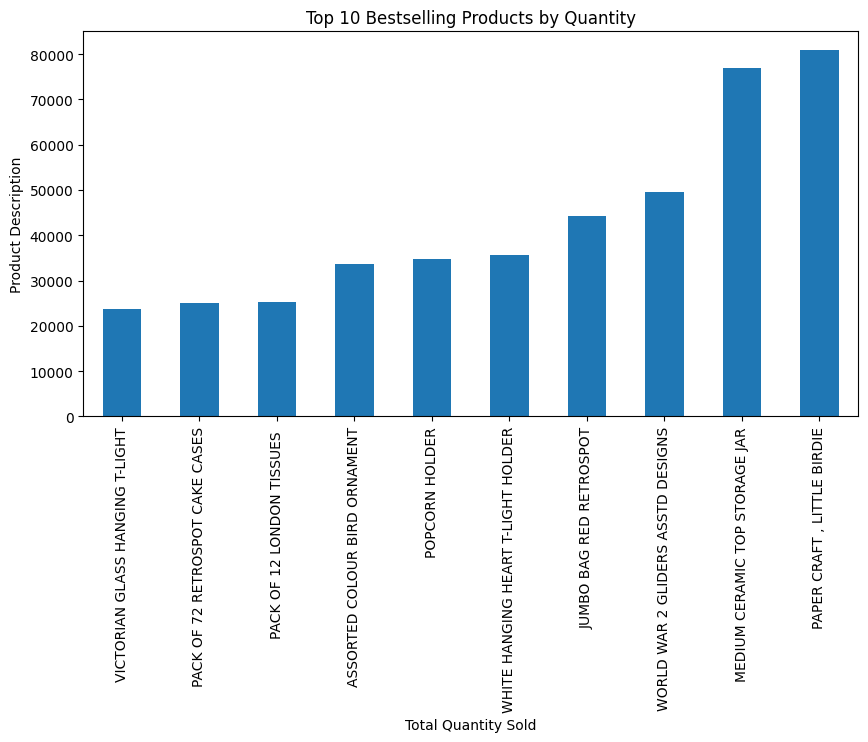

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
top_customers.sort_values().plot(kind='bar')

plt.title("Top 10 Bestselling Products by Quantity")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")

plt.show()

### Analysis 2: Top 10 Revenue Products

In [35]:
top_rvnue_customers = df_uk.groupby('Description')['total_Sales'].sum().sort_values(ascending=False).head(10)
top_rvnue_customers

Description
DOTCOM POSTAGE                        206248.77
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142273.29
WHITE HANGING HEART T-LIGHT HOLDER    100497.72
PARTY BUNTING                          93658.53
JUMBO BAG RED RETROSPOT                86471.34
MEDIUM CERAMIC TOP STORAGE JAR         80575.63
PAPER CHAIN KIT 50'S CHRISTMAS         62742.54
ASSORTED COLOUR BIRD ORNAMENT          54756.79
CHILLI LIGHTS                          53336.56
Name: total_Sales, dtype: float64

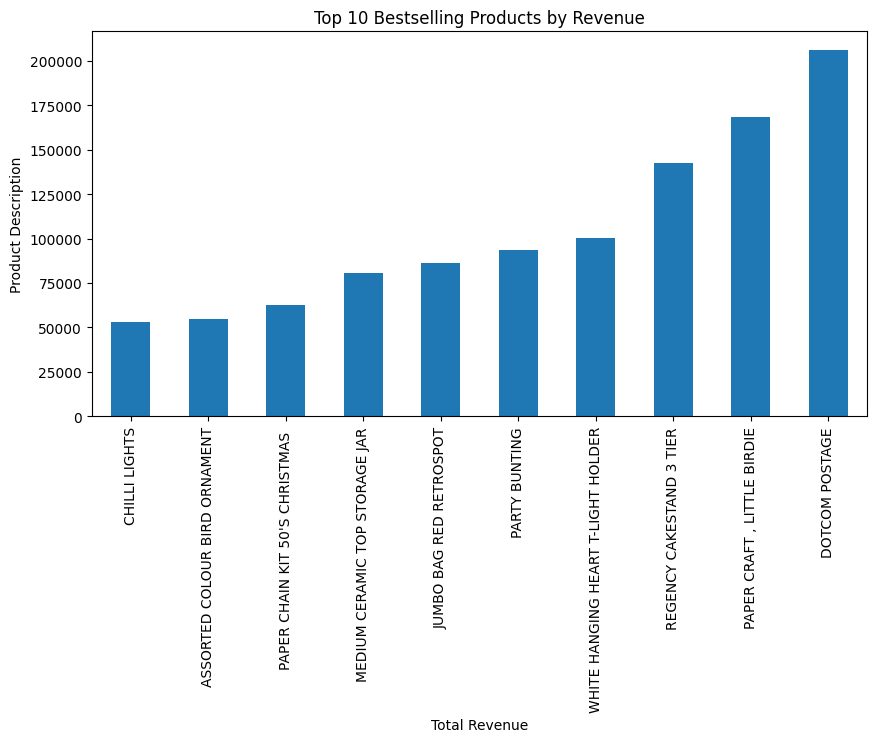

In [38]:
plt.figure(figsize=(10, 5))
top_rvnue_customers.sort_values().plot(kind='bar')

plt.title("Top 10 Bestselling Products by Revenue")
plt.xlabel("Total Revenue")
plt.ylabel("Product Description")


plt.show()

### Analysis 3: Sales by Hour

In [39]:
df_uk['InvoiceDate']=pd.to_datetime(df_uk['InvoiceDate'])
df_uk.info()

<class 'pandas.core.frame.DataFrame'>
Index: 487622 entries, 0 to 541893
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    487622 non-null  object        
 1   StockCode    487622 non-null  object        
 2   Description  487622 non-null  object        
 3   Quantity     487622 non-null  int64         
 4   InvoiceDate  487622 non-null  datetime64[ns]
 5   UnitPrice    487622 non-null  float64       
 6   CustomerID   487622 non-null  int64         
 7   Country      487622 non-null  object        
 8   total_Sales  487622 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 37.2+ MB


In [40]:
df_uk['hour'] = df_uk['InvoiceDate'].dt.hour
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_Sales,hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8


In [42]:
sales_by_hour = (
    df_uk
    .groupby("hour")["total_Sales"]
    .sum()
)

In [53]:
sales_by_hour.head(10)

hour
6           4.250
7       11124.580
8      186997.630
9      823542.291
10    1177378.341
11    1032975.870
12    1218362.020
13    1061984.840
14     966658.961
15    1197352.500
Name: total_Sales, dtype: float64

In [56]:
total_sales = sales_by_hour.sum()
sales_by_hour_pct = (sales_by_hour / total_sales) * 100
sales_by_hour_pct = sales_by_hour_pct.round(2)

In [57]:
sales_by_hour_pct

hour
6      0.00
7      0.12
8      2.08
9      9.15
10    13.08
11    11.47
12    13.53
13    11.80
14    10.74
15    13.30
16     7.70
17     4.77
18     1.56
19     0.50
20     0.21
Name: total_Sales, dtype: float64

In [58]:
sales_by_hour_summary = pd.DataFrame({
    "TotalSales": sales_by_hour,
    "SalesPercentage": sales_by_hour_pct
})

In [62]:
sales_by_hour_summary

,TotalSales,SalesPercentage
hour,,
6,4.250,0.00
7,11124.580,0.12
8,186997.630,2.08
9,823542.291,9.15
10,1177378.341,13.08
11,1032975.870,11.47
12,1218362.020,13.53
13,1061984.840,11.80
14,966658.961,10.74


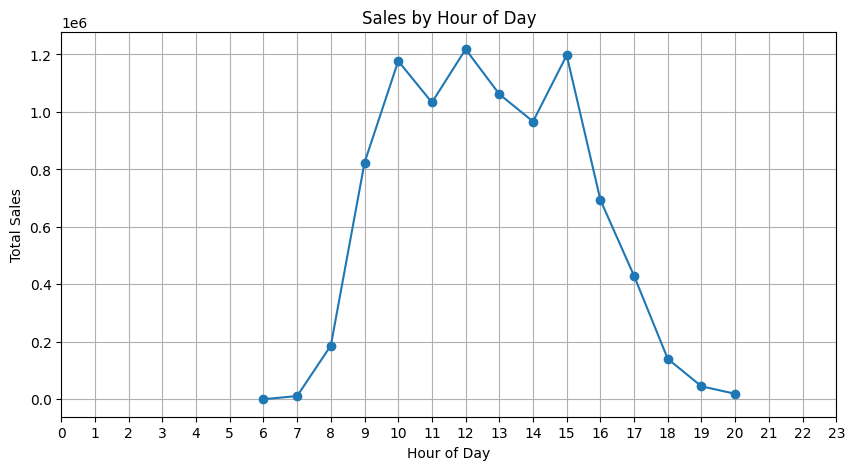

In [43]:
plt.figure(figsize=(10,5))
sales_by_hour.plot(kind="line", marker="o")

plt.title("Sales by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Total Sales")
plt.xticks(range(0,24))
plt.grid(True)

plt.show()

### Analysis 4: Sales by Day of Week

In [45]:
df_uk["DayOfWeek"] = df_uk["InvoiceDate"].dt.day_name()
df_uk.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total_Sales,hour,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,8,Wednesday
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,8,Wednesday
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,8,Wednesday


In [48]:
sales_by_day = (
    df_uk
    .groupby("DayOfWeek")["total_Sales"]
    .sum()
)

In [47]:
day_order = [
    "Monday", "Tuesday", "Wednesday",
    "Thursday", "Friday", "Saturday", "Sunday"
]

In [51]:
sales_by_day = sales_by_day.reindex(day_order)
sales_by_day.fillna(0, inplace=True)
sales_by_day

DayOfWeek
Monday       1528817.371
Tuesday      1885586.861
Wednesday    1540809.450
Thursday     1789239.810
Friday       1543816.221
Saturday           0.000
Sunday        714828.251
Name: total_Sales, dtype: float64

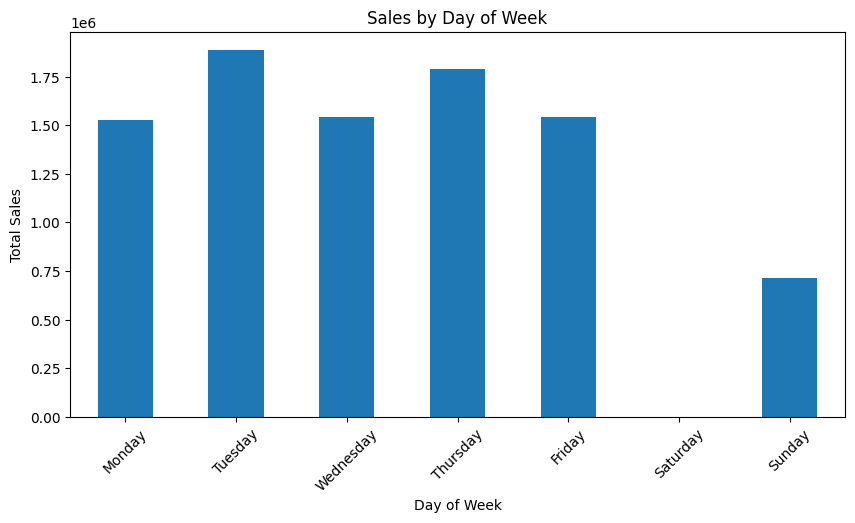

In [52]:
plt.figure(figsize=(10,5))
sales_by_day.plot(kind="bar")

plt.title("Sales by Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)

plt.show()